In [1]:
import os
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# from scripts.preprocessing import preprocess_data


In [2]:
os.chdir("../")

In [42]:
test_data = pd.read_csv("data/rossmann/test.csv")
sample_data = pd.read_csv("data/rossmann/sample_submission.csv")
store_data = pd.read_csv("data/rossmann/store.csv")

In [43]:
df = pd.merge(test_data, store_data, on='Store')


In [ ]:
from scripts.preprocessing import preprocess_data


df, label_encoders, scaler = preprocess_data(df)



In [6]:
# df.to_csv("data/cleandata.csv")

In [7]:
df = pd.read_csv("data/clean_test_data.csv")

In [ ]:
# Handle infinite and NaN values in X
X = df.drop(columns=['Sales'])  # Drop the 'Sales' column to use the remaining as features
X = X.replace([np.inf, -np.inf], np.nan)  # Replace infinity values with NaN
X = X.fillna(X.mode())  # Fill NaN values with the mode of the column

y = df['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns  # Identify string columns

# Define preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # OneHotEncode categorical columns
])

# Build a pipeline with preprocessor and RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess both numerical and categorical features
    ('regressor', RandomForestRegressor(random_state=42))  # RandomForest model
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

# Output the results

print("Root Mean Squared Error (RMSE):", rmse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')


In [ ]:
# from sklearn.inspection import permutation_importance

# # Calculate permutation importance
# results = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# # Create a DataFrame to store feature importances
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': results.importances_mean})

# # Sort features by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [12]:
# import datetime
# import pickle

# model_filename = f"data/model_{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.pkl"
# with open(model_filename, 'wb') as file:
#     pickle.dump(pipeline, file)

In [9]:
# with open(model_filename, 'rb') as file:
#     loaded_model = pickle.load(file)

# new_data = pd.read_csv("data/test.csv   ")
# predictions = loaded_model.predict(new_data)

ADF Statistic: -4.368104368168502
p-value: 0.00033788346141423953


<Figure size 1200x600 with 0 Axes>

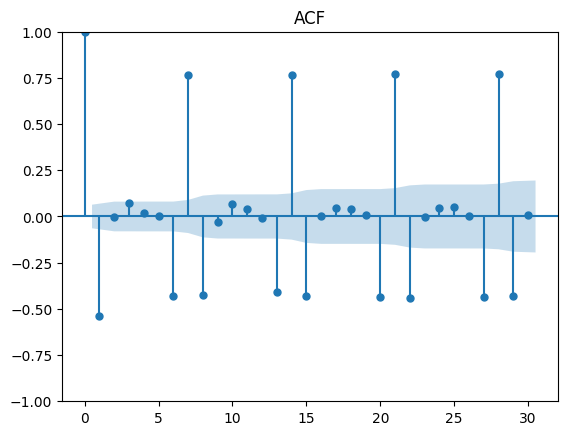

<Figure size 1200x600 with 0 Axes>

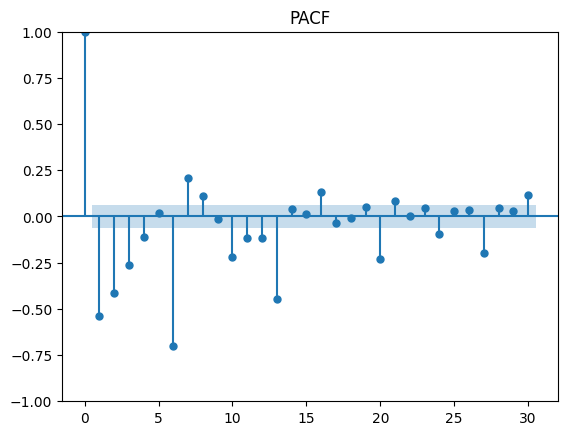

C:\Users\windows 10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.1118 - val_loss: 0.1075
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0960 - val_loss: 0.0660
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0787 - val_loss: 0.0620
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0709 - val_loss: 0.0730
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0673 - val_loss: 0.0531
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0573 - val_loss: 0.0515
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0560 - val_loss: 0.0448
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0545 - val_loss: 0.0437
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0568 - val_loss: 0.0453
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0480 - val_loss: 0.0535
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0468 - val_loss: 0.0408
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

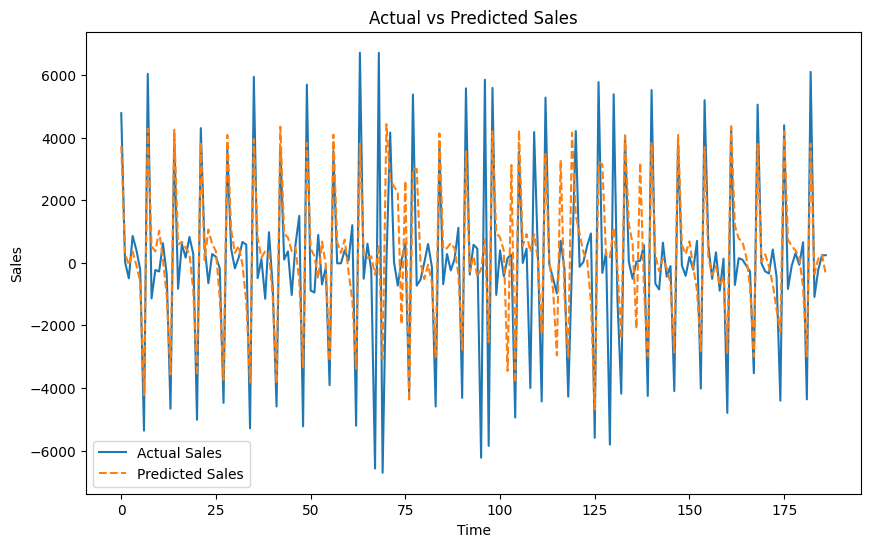

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load dataset
df = pd.read_csv('data/cleandata.csv', parse_dates=['Date'])  # Parse 'Date' as datetime format

# 2. Ensure 'Date' is the index and properly sorted
df = df.set_index('Date').sort_index()

# 3. Isolate data for a specific store
store_id = 1  # Select a store ID
store_data = df[df['Store'] == store_id]

# 4. Resample the sales data to get daily sales
store_sales = store_data['Sales'].resample('D').sum()

# 5. ADF test for stationarity
result = adfuller(store_sales.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# 6. Differencing the data to make it stationary
store_sales_diff = store_sales.diff().dropna()

# 7. Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(store_sales_diff, lags=30)
plt.title('ACF')

plt.figure(figsize=(12, 6))
plot_pacf(store_sales_diff, lags=30)
plt.title('PACF')
plt.show()

# 8. Create lagged features function
def create_lagged_features(series, lag=1):
    X, y = [], []
    for i in range(len(series) - lag):
        X.append(series[i:i + lag])
        y.append(series[i + lag])
    return np.array(X), np.array(y)

# 9. Convert sales data into sliding window data (look back 7 days)
lag = 7
X, y = create_lagged_features(store_sales_diff.values, lag=lag)

# 10. Split the data into train and test sets
split_ratio = 0.8
split_point = int(len(X) * split_ratio)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# 11. Scaling the features
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

# Reshape y into a 2D array
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Fit and transform train data, then transform test data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test_reshaped)

# Reshape X for LSTM input (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# 12. Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 13. Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# 14. Make predictions on the test data
y_pred_scaled = model.predict(X_test_scaled)

# 15. Invert scaling for the predictions and actual test data
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# 16. Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# 17. Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()
